# Transfer-matrix computation of DNA B-to-S transition

Our aim is to provide a physical interpretation to the B-to-S
transition and introduce the transfer-matrix method that can be
applied for a broad range of physical problems.

In [143]:
import numpy as np
import matplotlib.pyplot as plt

kb = 1.38e-23*1e12*1e9 # pN*nm
T=300
kbT=kb*T
U = np.array([1, 1])  # boundary condition of first site, vector U
N=1000
vir=0.01
%config InlineBackend.figure_format = 'retina'

In [144]:
def phi(F):
    def integ(l, A, gamma):
        alpha=np.sqrt(kbT/(4*A))
        for i in range(N):
            integrate=-l*(F+0.5*(1/gamma)*(F**2)-2*alpha*(F**0.5)-(2/3)*alpha*(1/gamma)*(F**1.5))
        return integrate
    phi_B=integ(0.34, 50, 1200)
    phi_S=integ(0.576, 13, 2700)
    return phi_B,phi_S


In [145]:
def lnZ_func(u,J,F):
    phiB,phiS=phi(F)
    right_vec=np.array([[np.exp(-phiB/kbT)],[np.exp(-(u+phiS)/kbT)]])
    matrix_mul = np.identity(2)
    max_val = np.zeros(N-1)
    T= np.zeros((2, 2))
    T[0,0]=np.exp(-(phiB-J)/kbT)
    T[0,1]=np.exp(-(phiB)/kbT)
    T[1,0]=np.exp(-(u+phiS)/kbT)
    T[1,1]=np.exp(-(u+phiS-J)/kbT)
    for i in range(N-1):
        matrix_mul = matrix_mul @ T
        max_val[i] = matrix_mul.max()
        matrix_mul = matrix_mul / max_val[i]
    lnZ = np.log(U @ matrix_mul @ right_vec) + np.sum(np.log(max_val))
    return lnZ

In [146]:
F_array=np.arange(1,120,2)

In [147]:
def extension_array(u,J):
    extension = np.zeros(len(F_array))
    for i in range(len(F_array)):
        F=F_array[i]
        lnZ=lnZ_func(u,J,F)
        lnZ1=lnZ_func(u,J,F+vir)
        extension[i]=kbT*(lnZ1-lnZ)/vir
    return extension

In [148]:
def WLC(l, A, gamma):
    x_f=np.zeros(len(F_array))
    for i in range(len(F_array)):
        F=F_array[i]
        x_f[i]=N*l*(1-np.sqrt(kbT/(4*A*F)))*(1+F/gamma)
    return x_f
B_DNA=WLC(0.34, 50, 1200)
S_DNA=WLC(0.576, 13, 2700)


<function matplotlib.pyplot.show(close=None, block=None)>

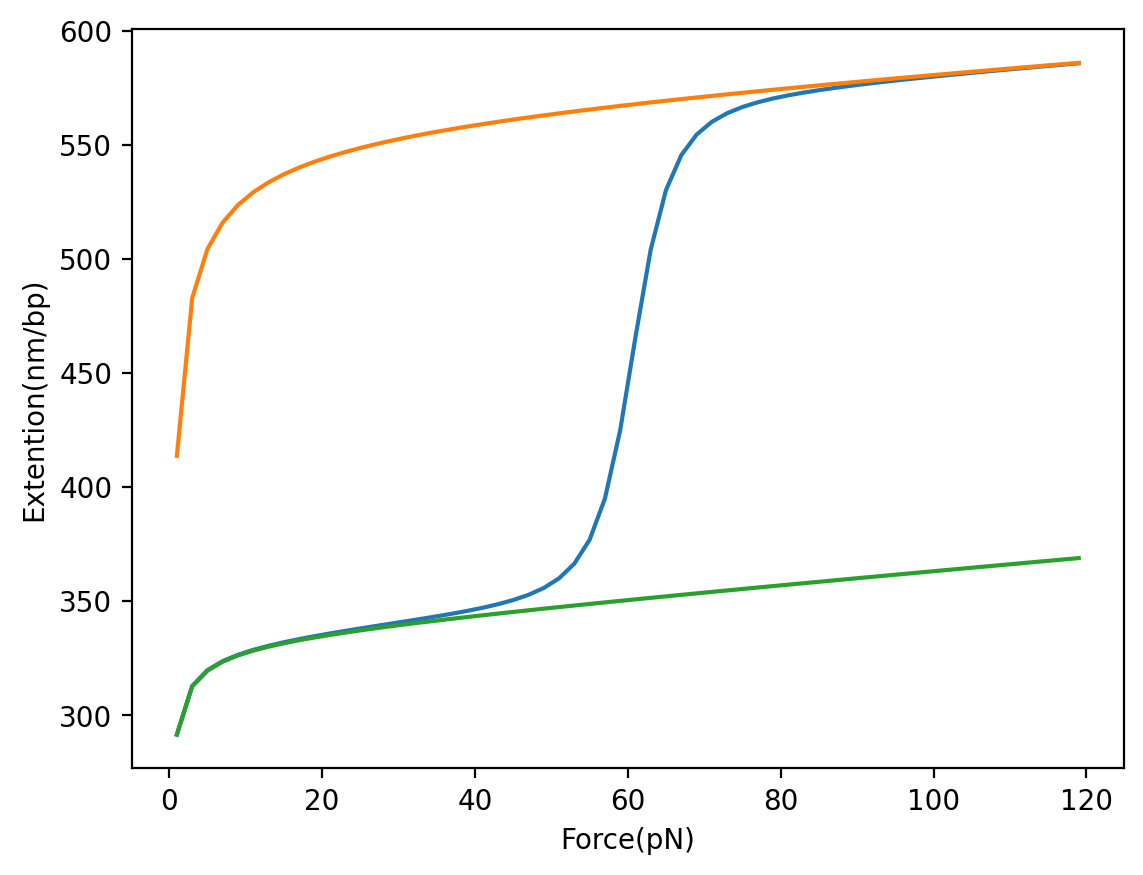

In [149]:

plt.plot(F_array,extension_array(3*kbT,2*kbT))
plt.plot(F_array,S_DNA)
plt.plot(F_array,B_DNA)

plt.xlabel('Force(pN)')
plt.ylabel('Extention(nm/bp)')
plt.show